<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/TestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /3_Group_5_Fold.xlsx')
data = data.iloc[:, 1:]
data

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,bad,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,bad,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,bad,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,good,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,bad,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,bad,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,good,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,bad,2


**get feature TimeDiff**

In [4]:
data = data.sort_values(['PatientUID', 'PatientVisitUID'])
data['TimeDiff'] = data.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data['TimeDiff'] = data['TimeDiff'].fillna(0)

In [5]:
data['time_t1'] = pd.to_datetime(data['time_t1'])

**dummy**

In [6]:
columns_to_encode = ['VisitLocation', 'Group']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data[column].unique())}
    data[column] = data[column].map(encoding_map)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52620 entries, 1 to 52619
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   InPatient                     52620 non-null  int64         
 4   OutPatient                    52620 non-null  int64         
 5   Emergency                     52620 non-null  int64         
 6   time_t1                       52620 non-null  datetime64[ns]
 7   eGFR_t1                       52620 non-null  float64       
 8   VisitLocation                 52620 non-null  int64         
 9   StartDTTM                     52620 non-null  datetime64[ns]
 10  EndDttm                       52620 non-null  datetime64[ns]
 11  LabCwhen                    

In [8]:
df = data.copy()

In [ ]:
#df.to_csv('data.csv')

# **Split Train Test**

In [9]:
X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'time_t1', 'StartDTTM', 'EndDttm', 'LabCwhen', 'VisitLocation', 'LabLocation'], axis=1) #we have to do the features selection
y = data['Slopes']

In [10]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []  # List to store X_train_scaled for each fold
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42184, 76)
Test set size: (10436, 76)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 2:
Training set size : (41978, 76)
Test set size: (10642, 76)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Fold 3:
Training set size : (42017, 76)
Test set size: (10603, 76)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Fold 4:
Training set size : (42027, 76)
Test set size: (10593, 76)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 5:
Training set size : (42274, 76)
Test set size: (10346, 76)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---



## **RF**



In [ ]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import warnings

# Filter out specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message="`max_features='auto'` has been deprecated")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Prepare hyperparameter grid for GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 2, 3, 4]
}

# Perform a single grid search
regr = RandomForestRegressor(random_state=0)
clf = GridSearchCV(regr, parameters, cv=3)  # Specify the desired number of inner folds
clf.fit(X_train, y_train)  # Use the entire training dataset

# Access the best hyperparameters
best_params = clf.best_params_
print(f"Best hyperparameters: {best_params}")

# Train models for each fold using the best hyperparameters
models = []  # List to store trained models
for fold, (X_train_scaled, y_train) in enumerate(zip(X_train_scaled_list, y_train_list)):
    regr_fold = RandomForestRegressor(random_state=0, **best_params)
    regr_fold.fit(X_train_scaled, y_train)

    models.append(regr_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, regr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, regr_fold.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


Best hyperparameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 150}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 1:
MAE_train: 3.340438903556544
MAE_test: 3.379114905406154
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 2:
MAE_train: 3.2964032113388915
MAE_test: 3.334170314144713
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 3:
MAE_train: 3.3443755091827714
MAE_test: 3.3925777139879942
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 4:
MAE_train: 3.2981945989825365
MAE_test: 3.3534044866157733
---
Fold 5:
MAE_train: 3.2935459627097217
MAE_test: 3.375493741991631
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


      Best hyperparameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 150}
      Fold 2:
      MAE_train: 3.2964032113388915
      MAE_test: 3.334170314144713

### **plot model**

In [ ]:
!pip install dtreeviz
!apt-get install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import dtreeviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


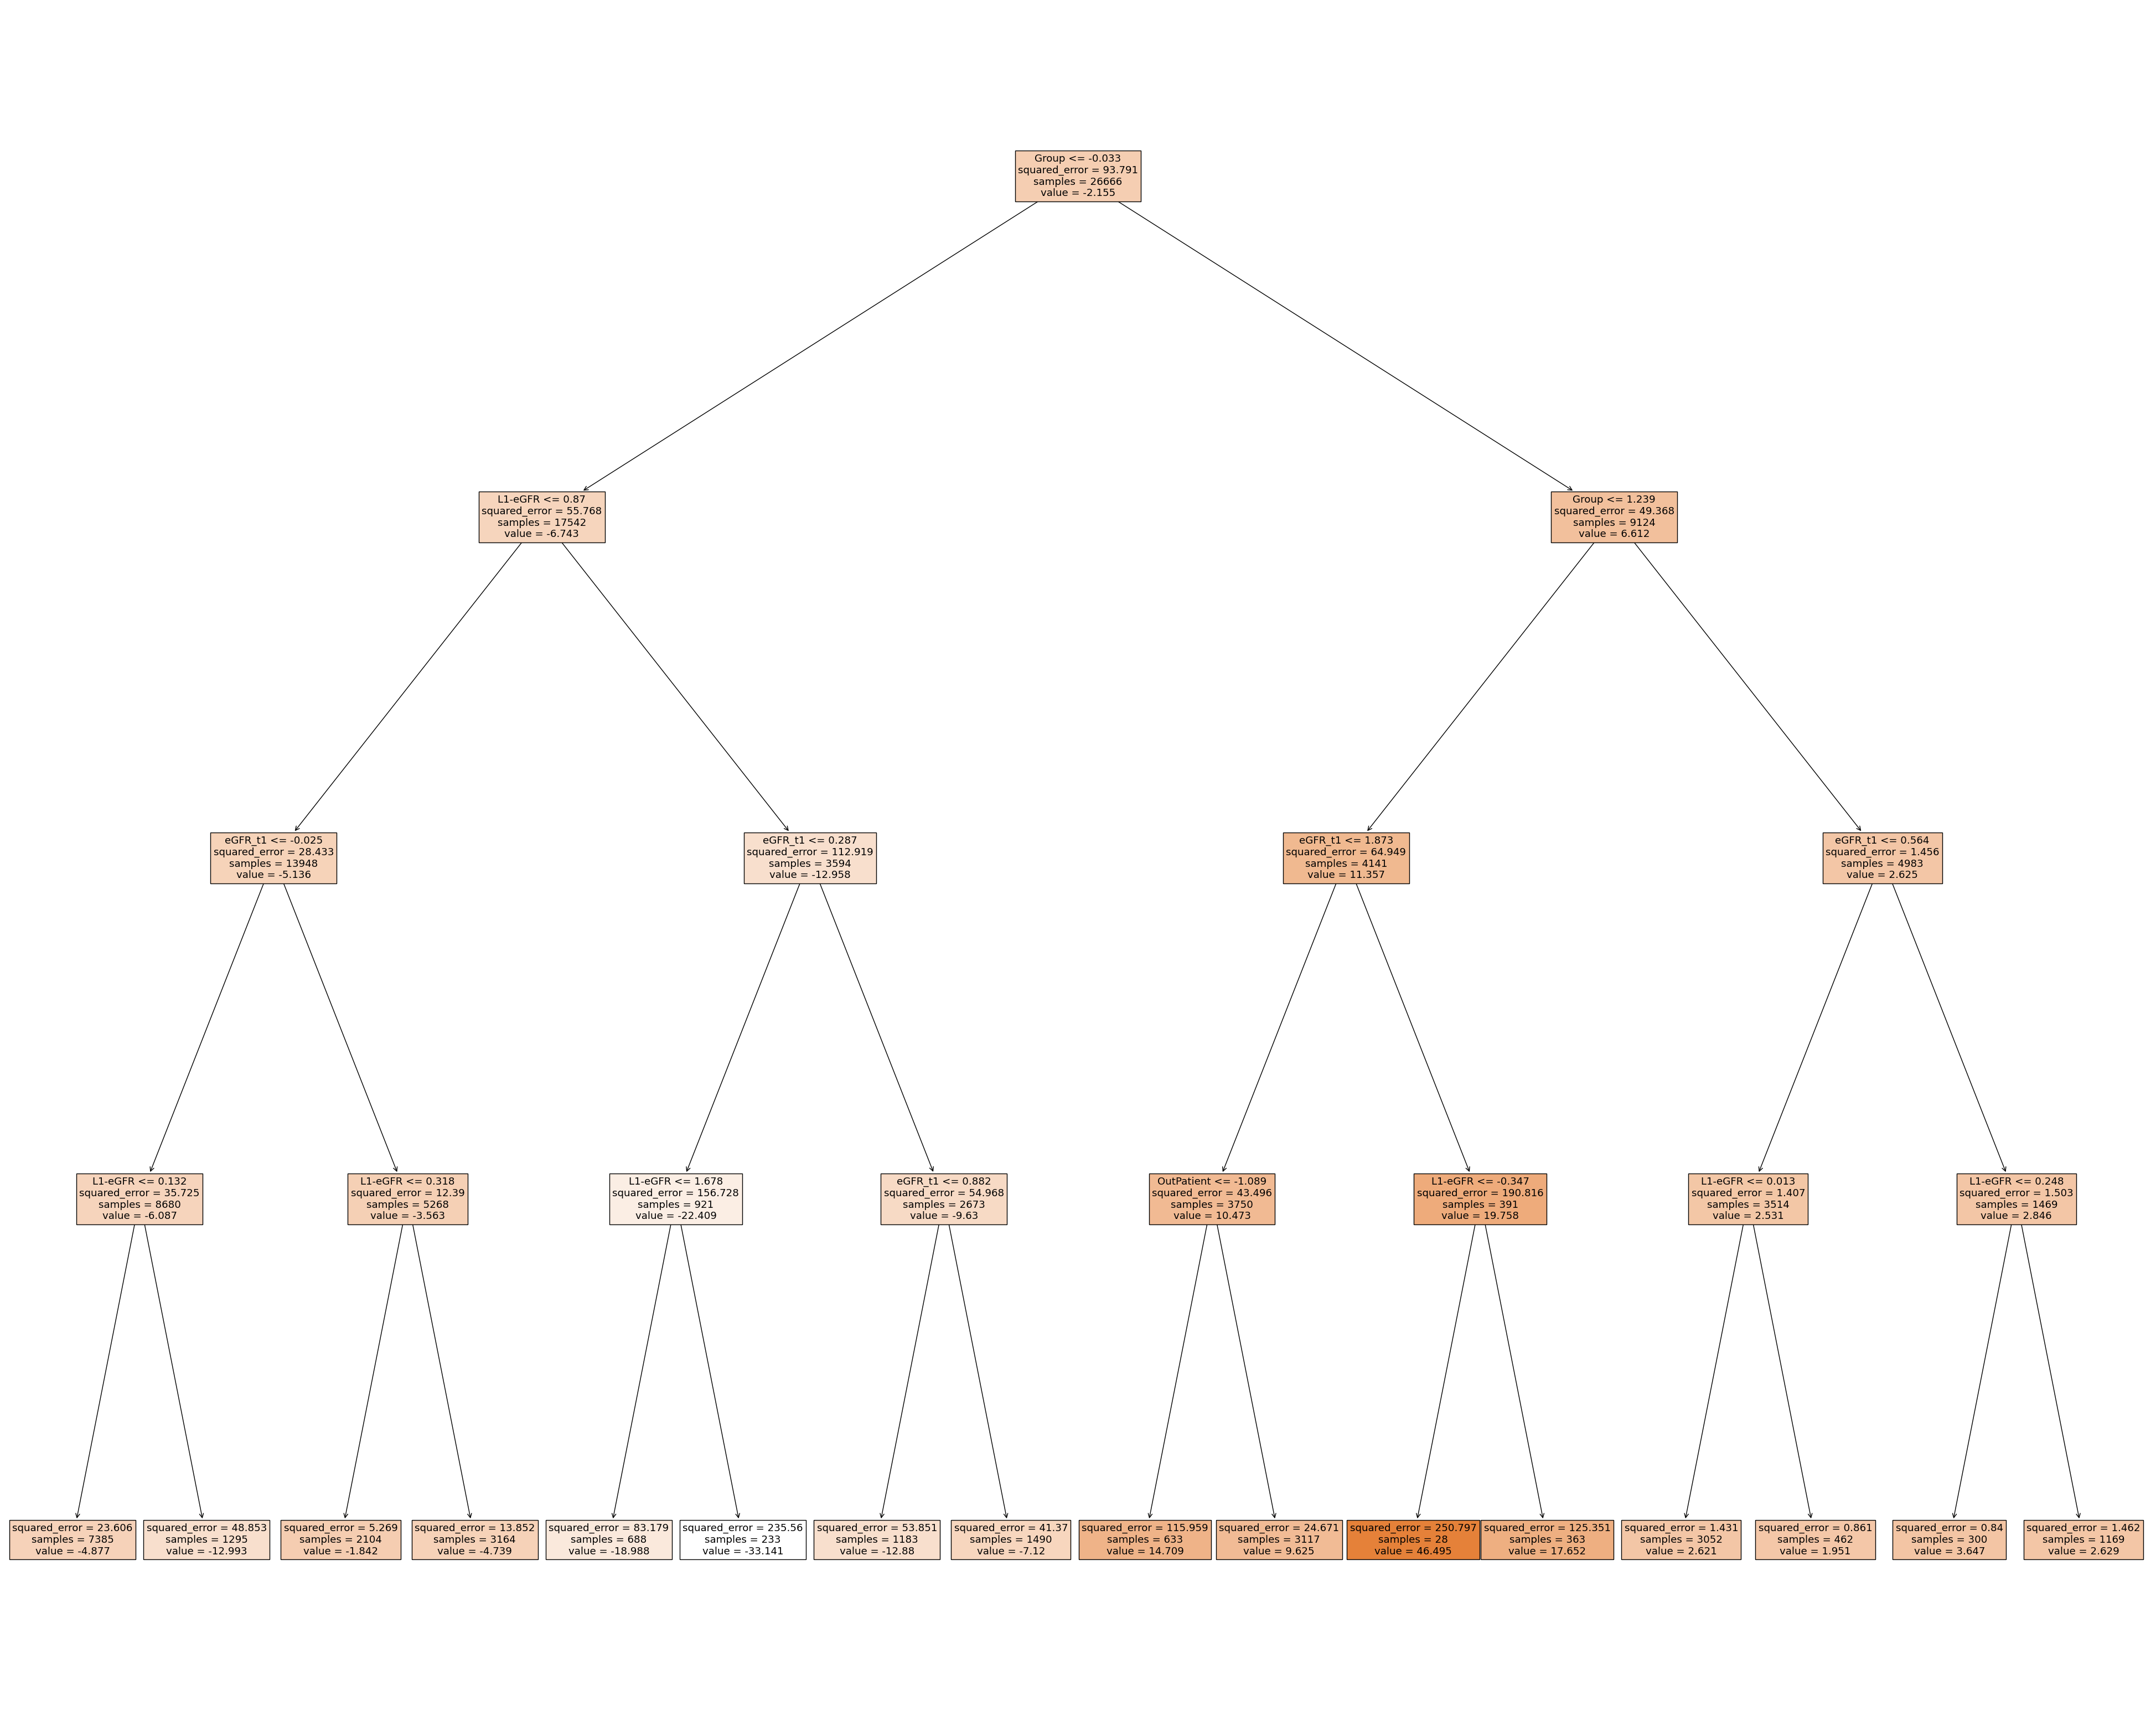

In [ ]:
# Find the model with the minimum MAE on the test set
best_model_index = min(range(len(models)), key=lambda i: mean_absolute_error(y_test_list[i], models[i].predict(X_test_scaled_list[i])))

# Plot the tree of the best model
plt.figure(figsize=(50, 40))
_ = tree.plot_tree(models[best_model_index].estimators_[0], feature_names=X.columns, filled=True)
plt.show()

### **y_pred**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature name

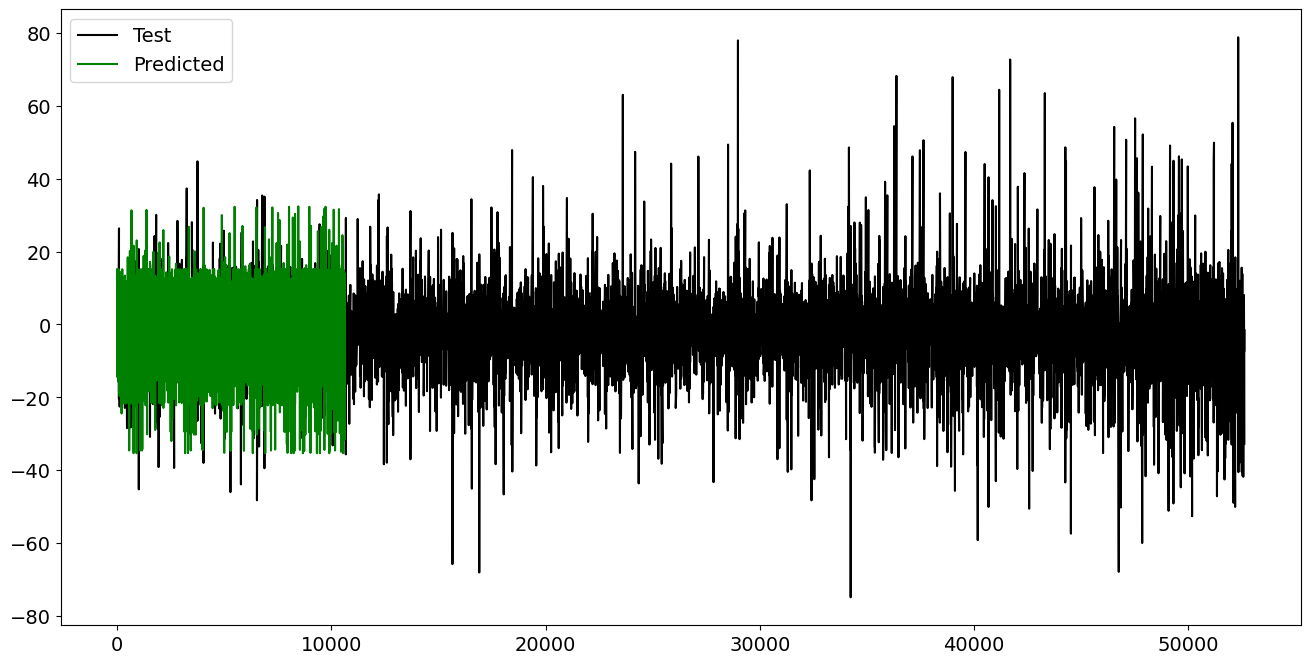

In [ ]:
# Find the model with the minimum MAE on the test set
best_model_index = min(range(len(models)), key=lambda i: mean_absolute_error(y_test_list[i], models[i].predict(X_test_scaled_list[i])))

# Use the best model for predictions
best_model = models[best_model_index]
y_pred = best_model.predict(X_test_scaled)

# Plot actual vs predicted values
plt.figure(figsize=(16, 8))
plt.plot(y_test, color='black', label='Test')
plt.plot(y_pred, color='green', label='Predicted')
plt.legend()
plt.show()


## **SVR**


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Prepare hyperparameter grid for GridSearchCV
parameters_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

# Perform a single grid search for SVR
svr = SVR()
clf_svr = GridSearchCV(svr, parameters_svr, cv=3)
clf_svr.fit(X_train, y_train)  # Use the entire training dataset

# Access the best hyperparameters for SVR
best_params_svr = clf_svr.best_params_
print(f"Best hyperparameters for SVR: {best_params_svr}")

# Train models for each fold using the best hyperparameters for SVR
models_svr = []  # List to store trained SVR models
for fold, (X_train_scaled, y_train) in enumerate(zip(X_train_scaled_list, y_train_list)):
    svr_fold = SVR(**best_params_svr)
    svr_fold.fit(X_train_scaled, y_train)

    models_svr.append(svr_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, svr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, svr_fold.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare hyperparameter grid for GridSearchCV
parameters_svr = {
    'C': [1, 10],
    'epsilon': [0.1, 0.5],
    'kernel': ['linear', 'rbf']
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.1, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform a single grid search for SVR
svr = SVR()
clf_svr = GridSearchCV(svr, parameters_svr, cv=3, n_jobs=1)
clf_svr.fit(X_train_scaled, y_train)  # Use the entire training dataset

# Access the best hyperparameters for SVR
best_params_svr = clf_svr.best_params_
print(f"Best hyperparameters for SVR: {best_params_svr}")

# Train models for each fold using the best hyperparameters for SVR
models_svr = []  # List to store trained SVR models
for fold, (X_train_scaled, y_train) in enumerate(zip(X_train_scaled_list, y_train_list)):
    svr_fold = SVR(**best_params_svr)
    svr_fold.fit(X_train_scaled, y_train)

    models_svr.append(svr_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, svr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, svr_fold.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


In [ ]:
# Access the best hyperparameters for SVR
best_params_svr = clf_svr.best_params_
print(f"Best hyperparameters for SVR: {best_params_svr}")

# Access the best score (e.g., mean cross-validated score)
best_score_svr = clf_svr.best_score_
print(f"Best mean cross-validated score: {best_score_svr}")


### **plot model**

In [ ]:
from dtreeviz import sviz

# Visualize the SVR model
viz = sviz(clf_svr.best_estimator_, X_train_scaled, y_train, target_name='target')
viz.view()


### **y_pred**

In [ ]:
# Find the SVR model with the minimum MAE on the test set
best_model_index_svr = min(range(len(models_svr)), key=lambda i: mean_absolute_error(y_test_list[i], models_svr[i].predict(X_test_scaled_list[i])))

# Use the best SVR model for predictions
best_model_svr = models_svr[best_model_index_svr]
y_pred_svr = best_model_svr.predict(X_test_scaled)

# Plot actual vs predicted values for SVR
plt.figure(figsize=(16, 8))
plt.plot(y_test, color='black', label='Test')
plt.plot(y_pred_svr, color='blue', label='SVR Predicted')
plt.legend()
plt.show()


## **LR**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


# Prepare hyperparameter grid for GridSearchCV
parameters_lasso = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000]  # You can adjust this parameter based on your needs
}

# Perform a single grid search for Lasso Regression
lasso = Lasso()
clf_lasso = GridSearchCV(lasso, parameters_lasso, cv=3)
clf_lasso.fit(X_train, y_train)  # Use the entire training dataset

# Access the best hyperparameters for Lasso Regression
best_params_lasso = clf_lasso.best_params_
print(f"Best hyperparameters for Lasso Regression: {best_params_lasso}")

# Train models for each fold using the best hyperparameters for Lasso Regression
models_lasso = []  # List to store trained Lasso Regression models
for fold, (X_train_scaled, y_train) in enumerate(zip(X_train_scaled_list, y_train_list)):
    lasso_fold = Lasso(**best_params_lasso)
    lasso_fold.fit(X_train_scaled, y_train)

    models_lasso.append(lasso_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, lasso_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, lasso_fold.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.924e+05, tolerance: 3.101e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.807e+05, tolerance: 2.990e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+05, tolerance: 2.259e

Best hyperparameters for Lasso Regression: {'alpha': 0.01, 'fit_intercept': False, 'max_iter': 3000}
Fold 1:
MAE_train: 3.1692623255013603
MAE_test: 3.1834792693071003
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Fold 2:
MAE_train: 3.1576713361581046
MAE_test: 3.1827212529341957
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Fold 3:
MAE_train: 3.1437733799911483
MAE_test: 3.1900982037955883
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Fold 4:
MAE_train: 3.1407409844077216
MAE_test: 3.1793858997011615
---
Fold 5:
MAE_train: 3.134789347181017
MAE_test: 3.1905147572894634
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


    Best hyperparameters for Lasso Regression: {'alpha': 0.01, 'fit_intercept': False, 'max_iter': 3000}

    Fold 4:
    MAE_train: 3.1407409844077216
    MAE_test: 3.1793858997011615
   
    Executing ==> 3m






### **y_pred**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warning

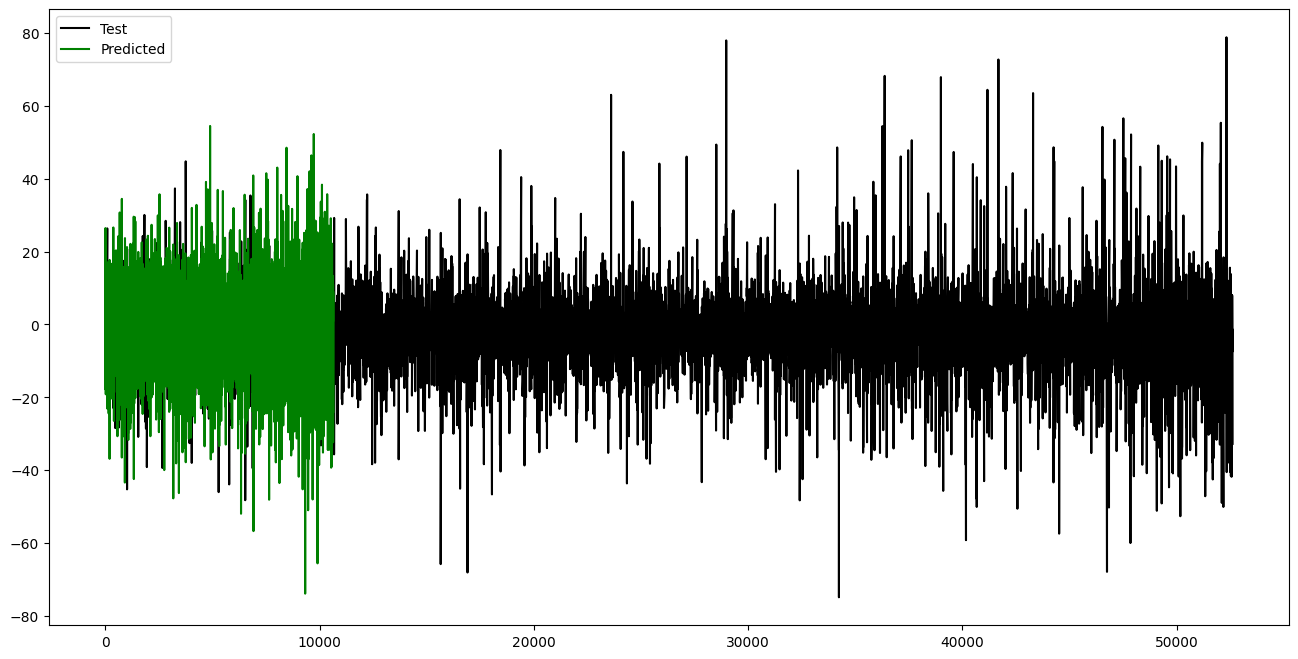

In [ ]:
import matplotlib.pyplot as plt

# Find the model with the minimum MAE on the test set
best_model_index = min(range(len(models_lasso)), key=lambda i: mean_absolute_error(y_test_list[i], models_lasso[i].predict(X_test_scaled_list[i])))

# Use the best model for predictions
best_model = models_lasso[best_model_index]
y_pred = best_model.predict(X_test_scaled)

# Plot actual vs predicted values
plt.figure(figsize=(16, 8))
plt.plot(y_test, color='black', label='Test')
plt.plot(y_pred, color='green', label='Predicted')
plt.legend()
plt.show()


## **FNN**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Prepare hyperparameter grid for RandomizedSearchCV
parameters_fnn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500]
}

# List to store trained FNN models
models_fnn = []

# Iterate over folds
for fold, (X_train_scaled, y_train) in enumerate(zip(X_train_scaled_list, y_train_list)):
    # Create FNN model
    fnn_model = MLPRegressor(random_state=42)

    # Perform Randomized Search with cross-validation
    randomized_search = RandomizedSearchCV(fnn_model, parameters_fnn, n_iter=10, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    randomized_result = randomized_search.fit(X_train_scaled, y_train)

    # Display the best parameters and corresponding MAE
    best_params = randomized_result.best_params_
    print(f"Best hyperparameters: {best_params}")

    # Train the model with the best parameters
    best_fnn_model = MLPRegressor(random_state=42, **best_params)
    best_fnn_model.fit(X_train_scaled, y_train)

    # Append the trained model to the list
    models_fnn.append(best_fnn_model)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, best_fnn_model.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, best_fnn_model.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


Best hyperparameters: {'max_iter': 1500, 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Fold 1:
MAE_train: 1.5750704649203435
MAE_test: 1.6106573938470594
---
Best hyperparameters: {'max_iter': 1000, 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}
Fold 2:
MAE_train: 1.5549310115096082
MAE_test: 1.5971810869611223
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Best hyperparameters: {'max_iter': 1500, 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}
Fold 3:
MAE_train: 1.5573264802211713
MAE_test: 1.6387903400699781
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Best hyperparameters: {'max_iter': 1000, 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Fold 4:
MAE_train: 1.582004084183345
MAE_test: 1.622001164685376
---
Best hyperparameters: {'max_iter': 1000, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}
Fold 5:
MAE_train: 1.5738386616160376
MAE_test: 2.1226078286579297
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(f"Overall Best hyperparameters: {best_params}")

Overall Best hyperparameters: {'max_iter': 1000, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}



      Overall Best hyperparameters: {'max_iter': 1000, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}
      Fold 2:
      MAE_train: 1.5549310115096082
      MAE_test: 1.5971810869611223
      ---
       (3hr20m)
     

In [ ]:
!pip install tensorflow
!pip install keras


In [ ]:
#ติดตั้งtensorflow.keras.wrappers.scikit_learnไม่ได้
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Function to create a Keras model
def create_keras_model(hidden_layer_sizes=(100,), activation='relu', alpha=0.0001, max_iter=500):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dense(1))  # Output layer with 1 neuron for regression
    model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression
    return model

# Prepare hyperparameter grid for GridSearchCV
parameters_keras = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500]
}

# Wrap the Keras model for use with scikit-learn
keras_regressor = KerasRegressor(build_fn=create_keras_model, epochs=50, batch_size=32, verbose=0)

# Perform Grid Search with cross-validation
grid_search_keras = GridSearchCV(keras_regressor, parameters_keras, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_result_keras = grid_search_keras.fit(X_train_scaled, y_train)

# Access the best hyperparameters
best_params_keras = grid_result_keras.best_params_
print(f"Best hyperparameters: {best_params_keras}")

# Train models for each fold using the best hyperparameters
models_keras = []  # List to store trained models
for fold, (X_train_scaled_fold, y_train_fold) in enumerate(zip(X_train_scaled_list, y_train_list)):
    keras_fold = KerasRegressor(build_fn=create_keras_model, **best_params_keras, epochs=50, batch_size=32, verbose=0)
    keras_fold.fit(X_train_scaled_fold, y_train_fold)

    models_keras.append(keras_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train_fold, keras_fold.predict(X_train_scaled_fold))
    mae_test = mean_absolute_error(y_test, keras_fold.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Prepare hyperparameter grid for GridSearchCV
parameters_fnn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500]
}

# List to store trained FNN models
models_fnn = []

# Iterate over folds
for fold, (X_train_scaled, y_train) in enumerate(zip(X_train_scaled_list, y_train_list)):
    # Create FNN model
    fnn_model = MLPRegressor(random_state=42)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(fnn_model, parameters_fnn, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_result = grid_search.fit(X_train_scaled, y_train)

    # Display the best parameters and corresponding MAE
    best_params = grid_result.best_params_
    print(f"Best hyperparameters: {best_params}")

    # Train the model with the best parameters
    best_fnn_model = MLPRegressor(random_state=42, **best_params)
    best_fnn_model.fit(X_train_scaled, y_train)

    # Append the trained model to the list
    models_fnn.append(best_fnn_model)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, best_fnn_model.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, best_fnn_model.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


### **plot model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegress

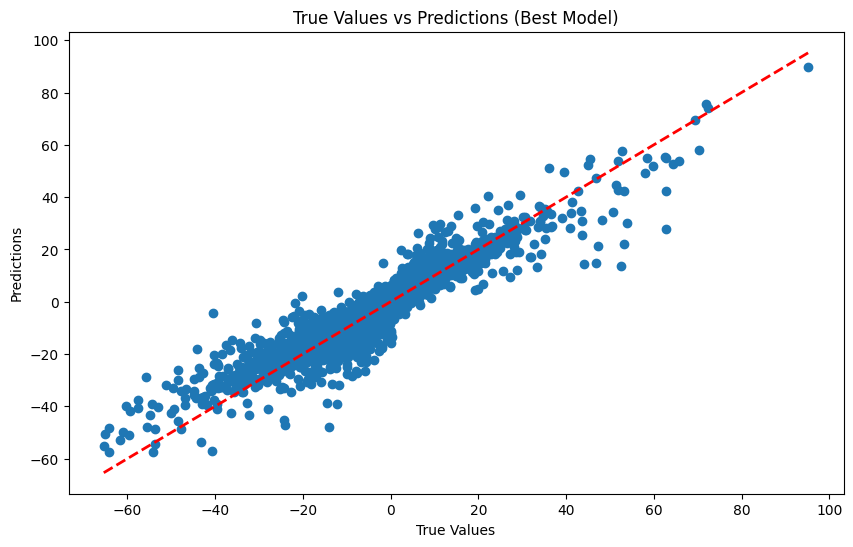

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Find the model with the minimum MAE on the test set
best_model_index = min(range(len(models_fnn)), key=lambda i: mean_absolute_error(y_test_list[i], models_fnn[i].predict(X_test_scaled_list[i])))

# Use the best MLPRegressor model from the list
best_fnn_model = models_fnn[best_model_index]

# Predict on the test data
y_pred = best_fnn_model.predict(X_test_scaled_list[best_model_index])

# Plot the predicted values against the true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_list[best_model_index], y_pred)
plt.plot([min(y_test_list[best_model_index]), max(y_test_list[best_model_index])],
         [min(y_test_list[best_model_index]), max(y_test_list[best_model_index])],
         linestyle='--', color='red', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Best Model)")
plt.show()


### **y_pred**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


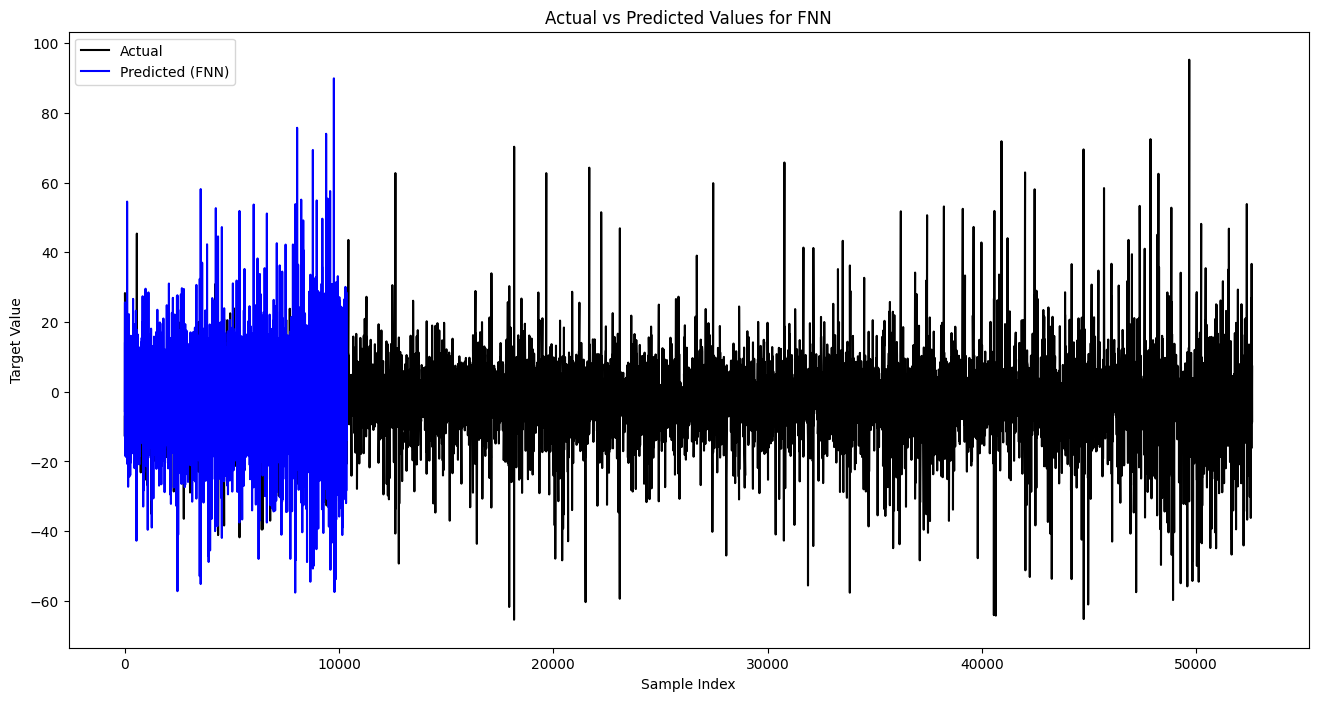

In [ ]:
# Use the best FNN model for predictions
best_fnn_model = models_fnn[best_model_index]
y_pred_fnn = best_fnn_model.predict(X_test_scaled_list[best_model_index])

# Plot actual vs predicted values for FNN
plt.figure(figsize=(16, 8))
plt.plot(y_test_list[best_model_index], color='black', label='Actual')
plt.plot(y_pred_fnn, color='blue', label='Predicted (FNN)')
plt.legend()
plt.title('Actual vs Predicted Values for FNN')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.show()
